1. Chon kiwi

Shape of image: (1414, 2119, 3)


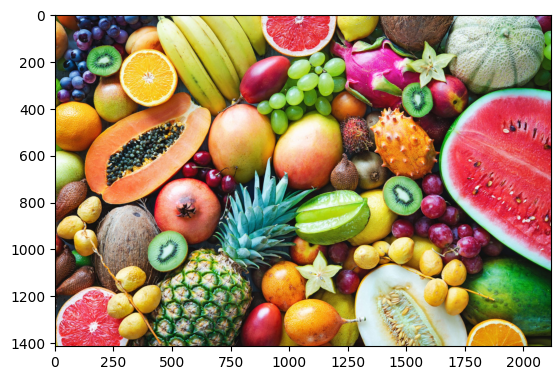

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')
print("Shape of image:", data.shape)

plt.imshow(data)
plt.show()

tinh tien anh

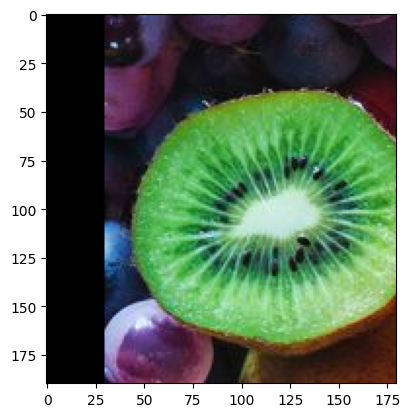

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')

x1, y1 = 120, 90
x2, y2 = 300, 280

kiwi_region = data[y1:y2, x1:x2]

shifted_kiwi = nd.shift(kiwi_region, (0, 30, 0))  # tinh tien 30px sang phai

plt.imshow(shifted_kiwi)
plt.savefig('img/shifted_kiwi.jpg')  
plt.show()

2. doi mau du du va dua hau

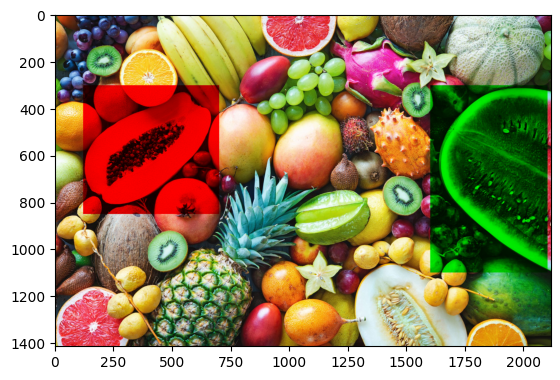

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')

x1, y1 = 120, 300
x2, y2 = 700, 850

x3, y3 = 1600, 300
x4, y4 = 2100, 1100

papaya_region = data[y1:y2, x1:x2]
watermelon_region = data[y3:y4, x3:x4]

data[y1:y2, x1:x2] = np.clip(papaya_region * [1, 0, 0], 0, 255) #red
data[y3:y4, x3:x4] = np.clip(watermelon_region * [0, 1, 0], 0, 255) #green

plt.imshow(data)
plt.savefig('img/fruits.jpg')
plt.show()

3. ngon nui va con thuyen xoay 45 do

Shape of image: (605, 1021, 3)


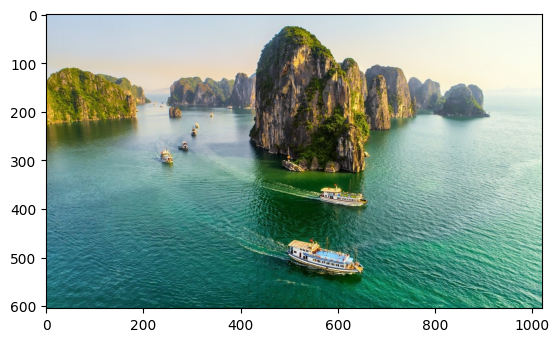

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('exercise/quang_ninh.jpg')
print("Shape of image:", data.shape)

plt.imshow(data)
plt.show()

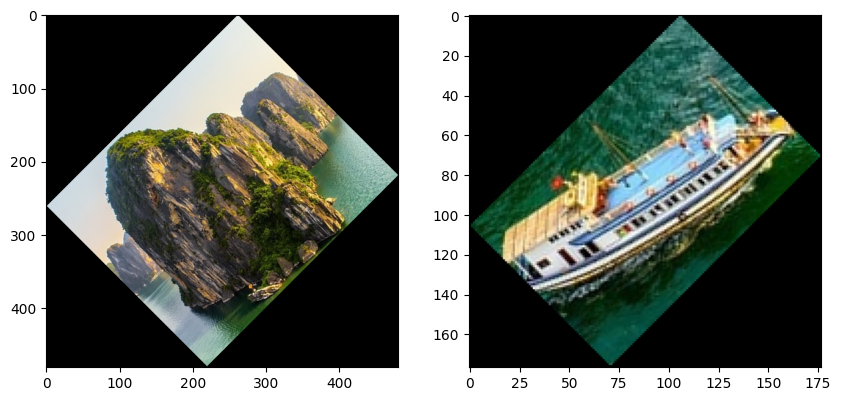

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('exercise/quang_ninh.jpg')

x1, y1 = 380, 20
x2, y2 = 750, 330

x3, y3 = 500, 450
x4, y4 = 650, 550

mountain_region = data[y1:y2, x1:x2]
boat_region = data[y3:y4, x3:x4]

mountain_region = nd.rotate(mountain_region, 45)
boat_region = nd.rotate(boat_region, 45)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(mountain_region)

plt.subplot(1, 2, 2)
plt.imshow(boat_region)

plt.savefig('img/place.jpg', bbox_inches='tight')
plt.show()

4. tang kich thuoc chua len 5 lan

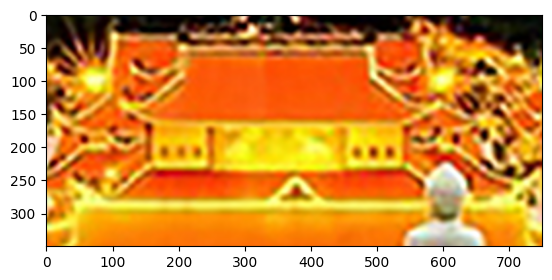

In [9]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

data = iio.imread('exercise/pagoda.jpg')

x1, y1 = 200, 130
x2, y2 = 350, 200

pagoda_region = data[y1:y2, x1:x2]

# Tăng kích thước vùng chọn lên 5 lần
scale_factor = 5
resized_pagoda_region = zoom(pagoda_region, (scale_factor, scale_factor, 1))

new_height, new_width = resized_pagoda_region.shape[:2]
img = np.zeros((new_height, new_width, 3), dtype=data.dtype)

img[:new_height, :new_width] = resized_pagoda_region

iio.imwrite('img/pagodax5.jpg', img)

plt.imshow(img)
plt.show()

5. chuong trinh tao menu

Chọn phép biến đổi:
T - Tịnh tiến (Shift)
X - Xoay (Rotate)
P - Phóng to (Zoom In)
H - Thu nhỏ (Zoom Out)
C - Bản đồ tọa độ (Coordinate Map)
Q - Thoát
Chọn hình ảnh từ thư mục 'exercise':
1: colorful-ripe-tropical-fruits.jpg
2: ha_long_bay.jpg
3: pagoda.jpg
4: quang_ninh.jpg


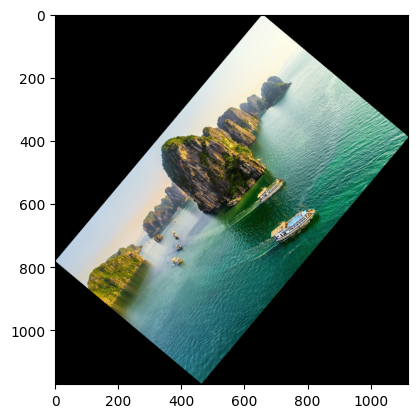

Chọn phép biến đổi:
T - Tịnh tiến (Shift)
X - Xoay (Rotate)
P - Phóng to (Zoom In)
H - Thu nhỏ (Zoom Out)
C - Bản đồ tọa độ (Coordinate Map)
Q - Thoát


In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt
import os
from skimage.transform import resize

def display_menu():
    print("Chọn phép biến đổi:")
    print("T - Tịnh tiến (Shift)")
    print("X - Xoay (Rotate)")
    print("P - Phóng to (Zoom In)")
    print("H - Thu nhỏ (Zoom Out)")
    print("C - Bản đồ tọa độ (Coordinate Map)")
    print("Q - Thoát")

def load_image():
    print("Chọn hình ảnh từ thư mục 'exercise':")
    images = os.listdir('exercise')
    for i, img in enumerate(images):
        print(f"{i + 1}: {img}")
    
    while True:
        try:
            choice = int(input("Nhập số hình ảnh bạn muốn chọn: ")) - 1
            if 0 <= choice < len(images):
                return iio.imread(os.path.join('exercise', images[choice])), images[choice]
            else:
                print("Lựa chọn không hợp lệ. Vui lòng thử lại.")
        except ValueError:
            print("Vui lòng nhập một số hợp lệ.")

def shift_image(data):
    x_shift = int(input("Nhập số pixel để tịnh tiến theo chiều ngang: "))
    y_shift = int(input("Nhập số pixel để tịnh tiến theo chiều dọc: "))
    
    if data.ndim == 3:  
        shifted_data = nd.shift(data, (y_shift, x_shift, 0))
    else:  
        shifted_data = nd.shift(data, (y_shift, x_shift))

    plt.imshow(shifted_data)
    plt.show()

def rotate_image(data):
    angle = float(input("Nhập góc xoay (độ): "))
    rotated_data = nd.rotate(data, angle)
    plt.imshow(rotated_data)
    plt.show()

def zoom_image(data):
    x1 = int(input("Nhập tọa độ x1: "))
    x2 = int(input("Nhập tọa độ x2: "))
    y1 = int(input("Nhập tọa độ y1: "))
    y2 = int(input("Nhập tọa độ y2: "))
    
    # Cắt vùng cần phóng to/thu nhỏ
    region = data[y1:y2, x1:x2]
    
    scale_factor = float(input("Nhập hệ số phóng to/thu nhỏ: "))
    
    # Tính kích thước mới
    new_height = int(region.shape[0] * scale_factor)
    new_width = int(region.shape[1] * scale_factor)

    # Thay đổi kích thước vùng
    zoomed_region = resize(region, (new_height, new_width), anti_aliasing=True)
    
    plt.imshow(zoomed_region)
    plt.show()

def coordinate_map(data):
    plt.imshow(data)
    plt.show()

# Chương trình chính
while True:
    display_menu()
    choice = input("Nhập lựa chọn của bạn: ").upper()
    
    if choice == 'Q':
        break
    
    image_data, image_name = load_image()
    
    if choice == 'T':
        shift_image(image_data)
    elif choice == 'X':
        rotate_image(image_data)
    elif choice == 'P':
        zoom_image(image_data)
    elif choice == 'H':
        zoom_image(image_data)  # Thu nhỏ
    elif choice == 'C':
        coordinate_map(image_data)
    else:
        print("Lựa chọn không hợp lệ, vui lòng thử lại.")